In [1]:
# Importance of Data Cleaning

# 1. Missing Values: Missing data points in a dataset can lead to biased results.
#     Task 1: Load a dataset and identify which columns have missing values.
#     Task 2: Replace missing values in a dataset with the column mean or mode.
#     Task 3: Compare model performance with and without handling missing values.
    
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
np.random.seed(42)
df_missing = df.mask(np.random.rand(*df.shape) < 0.05)
print("Missing values per column:")
print(df_missing.isnull().sum())
df_dropped = df_missing.dropna()
imputer = SimpleImputer(strategy='mean')
df_imputed = df_missing.copy()
df_imputed.iloc[:, :] = imputer.fit_transform(df_imputed)
def evaluate_model(df_cleaned):
    X = df_cleaned.drop(columns='target')
    y = df_cleaned['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)
mse_dropped = evaluate_model(df_dropped)
mse_imputed = evaluate_model(df_imputed)
print("\nModel Performance:")
print(f"Mean Squared Error (after dropping missing rows): {mse_dropped:.2f}")
print(f"Mean Squared Error (after mean imputation): {mse_imputed:.2f}")




Missing values per column:
age       13
sex       19
bmi       29
bp        16
s1        26
s2        24
s3        21
s4        29
s5        26
s6        24
target    17
dtype: int64

Model Performance:
Mean Squared Error (after dropping missing rows): 3190.41
Mean Squared Error (after mean imputation): 3345.59


In [2]:
# 2. Duplicate Data: Repeated data points can skew analysis and model results.
#     Task 1: Identify and remove duplicate entries from a dataset using a programming language or tool.
#     Task 2: Document the before-and-after dataset shape to understand the impact of duplicates.
#     Task 3: Explain to a classmate how duplicate data can affect prediction accuracy.
    
    
    

In [3]:
import pandas as pd
data = {
    'Name': ['Alice', 'Bob', 'Alice', 'David', 'Eve', 'Bob'],
    'Age': [25, 30, 25, 45, 22, 30],
    'City': ['NY', 'LA', 'NY', 'Chicago', 'Miami', 'LA']
}
df = pd.DataFrame(data)
print("Original Dataset:")
print(df)
print("\nBefore removing duplicates:")
print(f"Shape: {df.shape}")
duplicates = df.duplicated()
print("\nDuplicate rows:")
print(df[duplicates])
df_cleaned = df.drop_duplicates()
print("\nAfter removing duplicates:")
print(df_cleaned)
print(f"Shape: {df_cleaned.shape}") 

Original Dataset:
    Name  Age     City
0  Alice   25       NY
1    Bob   30       LA
2  Alice   25       NY
3  David   45  Chicago
4    Eve   22    Miami
5    Bob   30       LA

Before removing duplicates:
Shape: (6, 3)

Duplicate rows:
    Name  Age City
2  Alice   25   NY
5    Bob   30   LA

After removing duplicates:
    Name  Age     City
0  Alice   25       NY
1    Bob   30       LA
3  David   45  Chicago
4    Eve   22    Miami
Shape: (4, 3)


In [4]:
# 3. Incorrect Data Types: Data stored in incorrect formats can lead to parsing errors or incorrect analysis.
#     Task 1: Convert a column of string numbers to integers in a dataset.
#     Task 2: Identify and correct columns with inconsistent data types in a dataset.
#     Task 3: Discuss why correct data types are critical for feature engineering.
    
    
    

In [5]:
import pandas as pd
data = {
    'Age': ['25', '30', '45', 'twenty', '35'],
    'JoinDate': ['2022-01-01', '2021/12/30', 'not available', '2020-06-15', '2019-03-10'],
    'Salary': ['50000', '60000', '70000', 'NaN', '80000']
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')
print("\nCorrected DataFrame with proper data types:")
print(df)
print("\nData types after correction:")
print(df.dtypes) 

Original DataFrame:
      Age       JoinDate Salary
0      25     2022-01-01  50000
1      30     2021/12/30  60000
2      45  not available  70000
3  twenty     2020-06-15    NaN
4      35     2019-03-10  80000

Corrected DataFrame with proper data types:
    Age   JoinDate   Salary
0  25.0 2022-01-01  50000.0
1  30.0        NaT  60000.0
2  45.0        NaT  70000.0
3   NaN 2020-06-15      NaN
4  35.0 2019-03-10  80000.0

Data types after correction:
Age                float64
JoinDate    datetime64[ns]
Salary             float64
dtype: object


In [6]:
# 4. Outliers & Inconsistencies: Irregularities in data can mislead statistical analysis and model predictions.
#     Task 1: Visualize a dataset and identify outliers using a boxplot.
#     Task 2: Remove or adjust outliers and re-analyze the dataset.
#     Task 3: Research and report on a technique for handling outliers effectively.
    
    
    

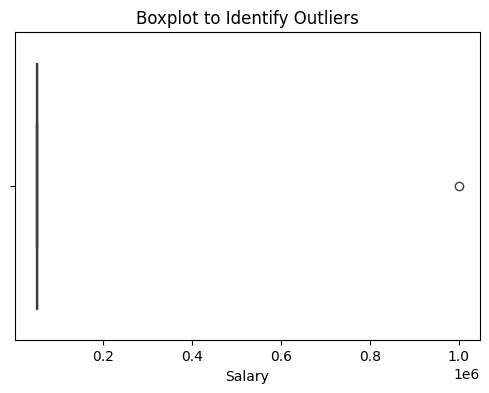


Original Data:
    Salary
0    50000
1    52000
2    51000
3    53000
4  1000000

Data After Outlier Removal:
   Salary
0   50000
1   52000
2   51000
3   53000

Data After Z-score Filtering:
    Salary   z_score
0    50000 -0.503952
1    52000 -0.498680
2    51000 -0.501316
3    53000 -0.496045
4  1000000  1.999993


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = {'Salary': [50000, 52000, 51000, 53000, 1000000]}
df = pd.DataFrame(data)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Salary'])
plt.title('Boxplot to Identify Outliers')
plt.show()
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
print("\nOriginal Data:")
print(df)
print("\nData After Outlier Removal:")
print(df_cleaned)
from scipy.stats import zscore
df['z_score'] = zscore(df['Salary'])
df_z_filtered = df[df['z_score'].abs() < 3]
print("\nData After Z-score Filtering:")
print(df_z_filtered)